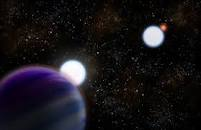

<p style='font-size: 16px'>Exoplanets are planets that orbit a star other than our sun. The prefix exo comes from the Greek and means outside; these worlds are far, far outside our own solar system. Astronomers have confirmed more than 4,000 exoplanets orbiting distant stars, with at least 1,000 more more awaiting confirmation. They found the first two exoplanets orbiting a pulsar in 1992. They confirmed the first exoplanet orbiting a sunlike star in 1995. Prior to those discoveries, the existence of planetary systems other than our own had been surmised for centuries and in the early 20th century a planet was heralded for Barnard’s Star (it later turned out to be spurious). The true discoveries came with advancing technology, a relatively recent development. <a href="https://earthsky.org/astronomy-essentials/what-are-exoplanets">Source</a></p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")
pd.options.plotting.backend = "plotly"

data = pd.read_csv('../input/kepler-labelled-time-series-data/exoTrain.csv')
train_data = pd.read_csv('../input/kepler-labelled-time-series-data/exoTrain.csv')
test_data = pd.read_csv('../input/kepler-labelled-time-series-data/exoTest.csv')

# Description of data

In [2]:
data.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,1.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,1.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,1.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,2.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


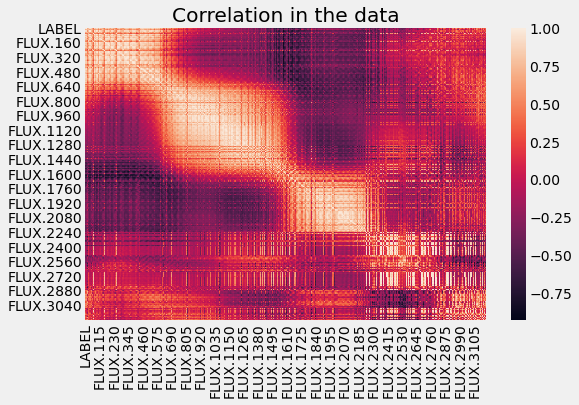

In [3]:
sns.heatmap(data.corr())
plt.title('Correlation in the data')
plt.show()

# Treating missing and duplicate values

In [4]:
fig = data.isnull().sum().reset_index().plot(kind='bar', x='index', y=0)
fig.update_layout(title="Checking for Missing Values", xaxis_title="Variable", yaxis_title="Missing Value Count")
fig.show()

In [5]:
# checking for duplicate values

data = data.drop_duplicates()

There is no missing or duplicate data present within the data. This is a plus point in forming a prediction model.

# Treating outliers

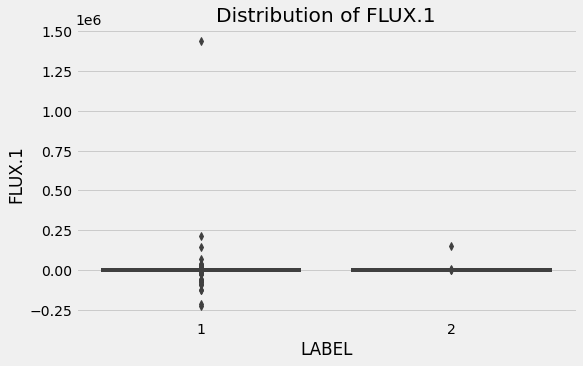

In [6]:
sns.boxplot(data=data, x='LABEL', y='FLUX.1')
plt.title('Distribution of FLUX.1')
plt.show()

The above code cell shows a very high outlier. 

Since the number of outlier observed here is only 1 it will be safe to drop that data point itself.

This will result in no data loss.

In [7]:
print('Dropping Outliers')
data.drop(data[data['FLUX.1']>250000].index, axis=0, inplace=True)

Dropping Outliers


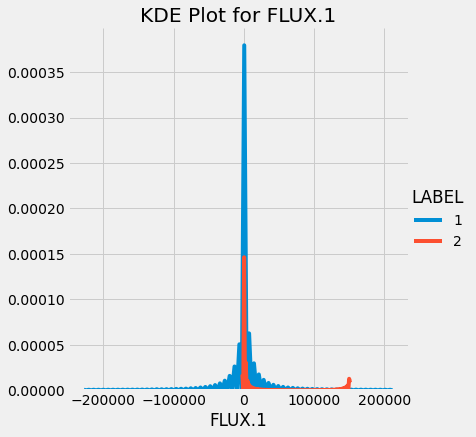

In [8]:
sns.FacetGrid(data, hue="LABEL", height=6,).map(sns.kdeplot, "FLUX.1",shade=True).add_legend()
plt.title('KDE Plot for FLUX.1')
plt.show()

# Checking the target variable

In [9]:
data['LABEL'].value_counts().reset_index().plot(kind='bar', x='index', y='LABEL', color='LABEL')

# Relation between variables

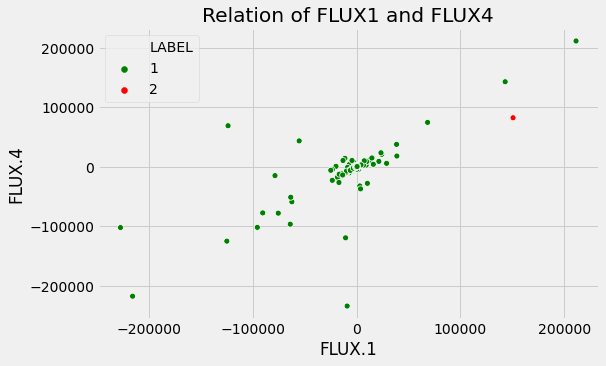

In [10]:
sns.scatterplot(data=data, x='FLUX.1', y='FLUX.4', hue='LABEL', palette=['g','r'])
plt.title('Relation of FLUX1 and FLUX4')
plt.show()

In [11]:
fig = px.scatter_matrix(data[['FLUX.1','FLUX.2','FLUX.3','FLUX.4','FLUX.5']])
fig.update_layout(title="Scatter Matrix for first 5 light intensities")
fig.show()

Pairplot for first 5 intensities


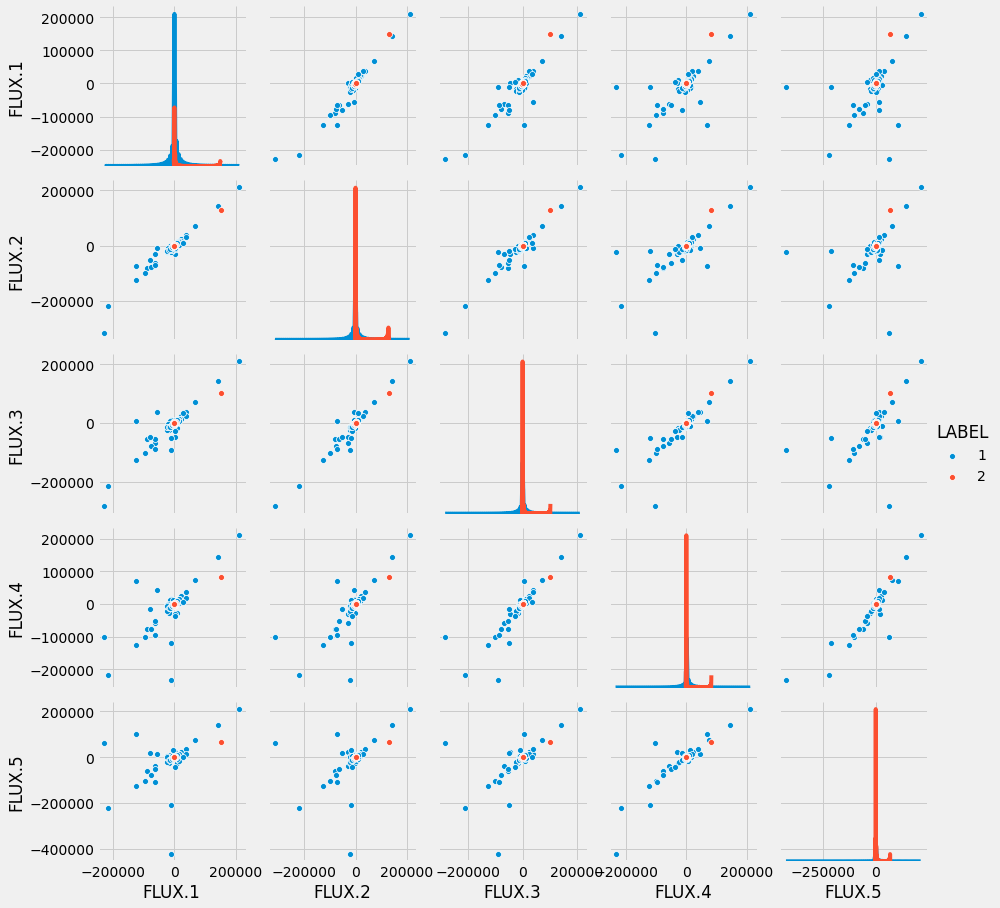

In [12]:
print('Pairplot for first 5 intensities')
sns.pairplot(data=data[['LABEL','FLUX.1','FLUX.2','FLUX.3','FLUX.4','FLUX.5']], hue='LABEL')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.3)

train_X = train.drop('LABEL', axis=1)
train_y = train['LABEL']
test_X = test.drop('LABEL', axis=1)
test_y = test['LABEL']

In [14]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_curve,accuracy_score,plot_confusion_matrix

# Logistic Regression

In [15]:
model = LogisticRegression(class_weight={1:100, 2:1})
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is', accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.6572739187418086


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



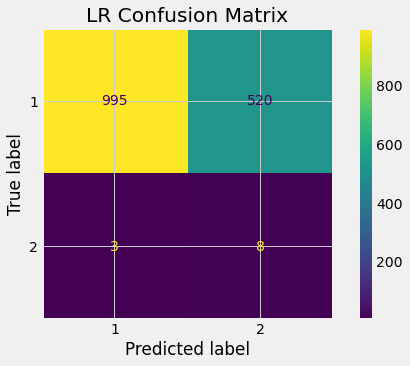

In [16]:
plot_confusion_matrix(model, test_X, test_y)
plt.title('LR Confusion Matrix')
plt.show()

Logistic Regression is underfitting the data

# SVC

In [17]:
model = SVC(C=0.1, kernel='poly')
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print('The accuracy of the SVC is', accuracy_score(prediction,test_y))

The accuracy of the SVC is 0.9921363040629095


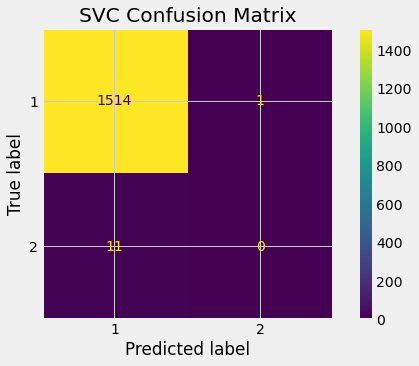

In [18]:
plot_confusion_matrix(model, test_X, test_y)
plt.title('SVC Confusion Matrix')
plt.show()

SVC on the other hand is highly overfitting on the data.

Since the dataset is highly imbalanced even if the model predicts the same class for all data points the accuracy is reaching 99%.

# Decision Trees

In [19]:
model = DecisionTreeClassifier(max_depth=5, random_state=13)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print('The accuracy of the Decision Tree is', accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9908256880733946


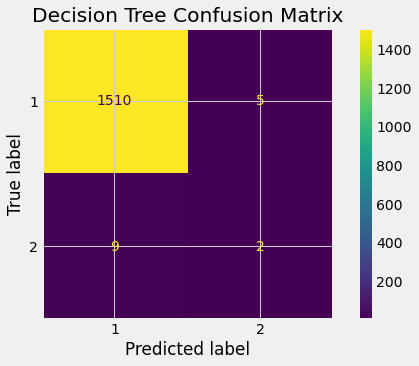

In [20]:
plot_confusion_matrix(model, test_X, test_y)
plt.title('Decision Tree Confusion Matrix')
plt.show()

Decision trees seems to be providing a better result compare to logistic Regression or SVC.

Now let's check the ROC curve to see if it really worked

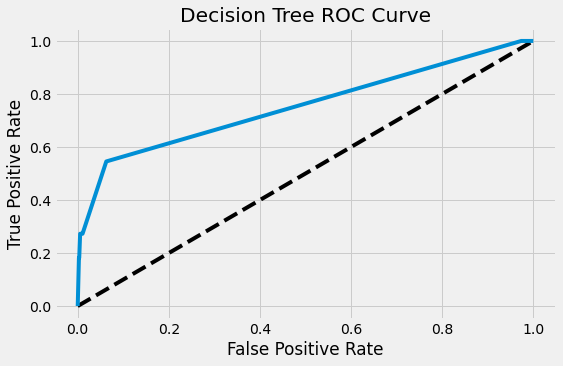

In [21]:
model = DecisionTreeClassifier(max_depth=5, random_state=13)
model.fit(train_X, train_y)
y_pred_prob = model.predict_proba(test_X)[:,1]
fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob, pos_label=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='DT')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.show()

The above ROC curve is proving that the roc_auc score is 50% and hence the model is totally overfiting to provide high accuracy.

# Applying Synthetic Minority Oversampling Technique

In [22]:
from imblearn.over_sampling import SMOTE
model = SMOTE()
ov_train_x,ov_train_y = model.fit_sample(data.drop('LABEL',axis=1), data['LABEL'])
ov_train_y = ov_train_y.astype('int')

# Visualizing new target variable

In [23]:
ov_train_y.value_counts().reset_index().plot(kind='bar', x='index', y='LABEL')

Now the class imbalance problems is solved. Let's check the modelon the new dataset now.

In [24]:
train_X, test_X, train_y, test_y = train_test_split(ov_train_x, ov_train_y, test_size=0.33, random_state=42)

model = DecisionTreeClassifier(max_depth=5, random_state=13)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print('The accuracy of the Decision Tree is', accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9375937593759376


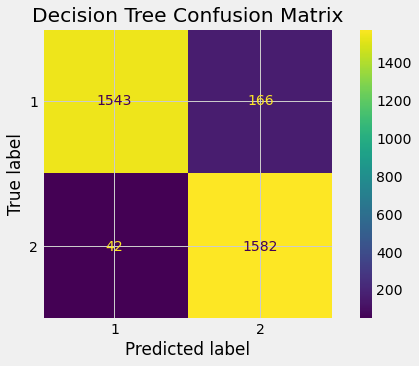

In [25]:
plot_confusion_matrix(model, test_X, test_y)
plt.title('Decision Tree Confusion Matrix')
plt.show()

Now the model is performing much better and provides a much higher accuracy of 91.5%

Let's check the roc curve

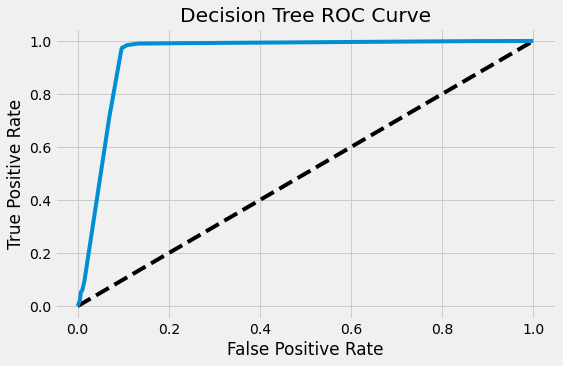

In [26]:
model = DecisionTreeClassifier(max_depth=5, random_state=13)
model.fit(train_X, train_y)
y_pred_prob = model.predict_proba(test_X)[:,1]
fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob, pos_label=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='DT')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.show()

The ROC curve and the roc_auc score also confirms that the model is perform much better than before.

In the next version I will be adding a neural network classifier. Do leave an upvote if you like the notebook.